In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [2]:
pollutants = ['co', 'o3', 'pm10', 'pm25', 'so2']

In [3]:
ds = {}

In [4]:
for specie in pollutants:
    ds[specie] = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/{}_15to18.csv'.format(specie))
    ds[specie] = ds[specie].set_index('City')

In [5]:
for specie in pollutants:
    print("The shape of {} data is: ".format(specie), ds[specie].shape)

The shape of co data is:  (113, 584)
The shape of o3 data is:  (102, 572)
The shape of pm10 data is:  (189, 581)
The shape of pm25 data is:  (156, 527)
The shape of so2 data is:  (114, 584)


## Visualization

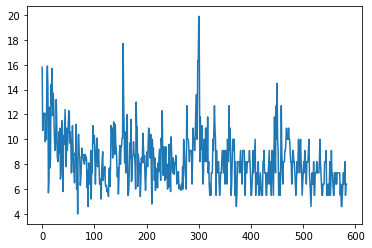

In [6]:
plt.plot(ds['co'].iloc[4,:].values)

#### Split the data into train and test part

In [7]:
ds_train, ds_test = {}, {}

In [8]:
for specie in pollutants:
    # discard the last observation if the dimension is odd
    if ds[specie].shape[1]%2 != 0:
        ds[specie] = ds[specie].iloc[:, :-1]
    # split
    ds_train[specie] = ds[specie].iloc[:, :ds[specie].shape[1]//2]
    ds_test[specie] = ds[specie].iloc[:, ds[specie].shape[1]//2:]
    print("The shape of {} data is: ".format(specie), ds_train[specie].shape, ds_test[specie].shape)

The shape of co data is:  (113, 292) (113, 292)
The shape of o3 data is:  (102, 286) (102, 286)
The shape of pm10 data is:  (189, 290) (189, 290)
The shape of pm25 data is:  (156, 263) (156, 263)
The shape of so2 data is:  (114, 292) (114, 292)


## Variance Explained Compute

#### CO

In [20]:
# Use matlab to compute the eigenvectors, and import them

v_ordi = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_ordi.txt', header = None).squeeze()

v_mnt = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_mnt.txt', header = None).squeeze()

# cardinality 0.99
v_trunc = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_trunc.txt', header = None).squeeze()

# lambda 10000
v_elas = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_elas.txt', header = None).squeeze()

In [21]:
score_ordi = pd.DataFrame(ds_test['co'].apply(lambda x: np.dot(x, v_ordi), axis = 1))
score_mnt = pd.DataFrame(ds_test['co'].apply(lambda x: np.dot(x, v_mnt), axis = 1))
score_trunc = pd.DataFrame(ds_test['co'].apply(lambda x: np.dot(x, v_trunc), axis = 1))
score_elas = pd.DataFrame(ds_test['co'].apply(lambda x: np.dot(x, v_elas), axis = 1))

In [22]:
print( "The variance explained by ordinary principal component:", np.var(score_ordi.values) / sum(ds_test['co'].cov().values.diagonal()) )
print( "The variance explained by monotone principal component:", np.var(score_mnt.values) / sum(ds_test['co'].cov().values.diagonal()) )
print( "The variance explained by truncated principal component:", np.var(score_trunc.values) / sum(ds_test['co'].cov().values.diagonal()) )
print( "The variance explained by elassPCA principal component:", np.var(score_elas.values) / sum(ds_test['co'].cov().values.diagonal()) )

The variance explained by ordinary principal component: 0.5477745422072864
The variance explained by monotone principal component: 0.5993558714959029
The variance explained by truncated principal component: 0.5452719830761555
The variance explained by elassPCA principal component: 0.5472753328118529


#### Ozone

In [23]:
# Use matlab to compute the eigenvectors, and import them

v_ordi = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_ordi.txt', header = None).squeeze()

v_mnt = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_mnt.txt', header = None).squeeze()

# cardinality 0.99
v_trunc = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_trunc.txt', header = None).squeeze()

# lambda 10000
v_elas = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_elas.txt', header = None).squeeze()

In [24]:
score_ordi = pd.DataFrame(ds_test['o3'].apply(lambda x: np.dot(x, v_ordi), axis = 1))
score_mnt = pd.DataFrame(ds_test['o3'].apply(lambda x: np.dot(x, v_mnt), axis = 1))
score_trunc = pd.DataFrame(ds_test['o3'].apply(lambda x: np.dot(x, v_trunc), axis = 1))
score_elas = pd.DataFrame(ds_test['o3'].apply(lambda x: np.dot(x, v_elas), axis = 1))

In [25]:
print( "The variance explained by ordinary principal component:", np.var(score_ordi.values) / sum(ds_test['o3'].cov().values.diagonal()) )
print( "The variance explained by monotone principal component:", np.var(score_mnt.values) / sum(ds_test['o3'].cov().values.diagonal()) )
print( "The variance explained by truncated principal component:", np.var(score_trunc.values) / sum(ds_test['o3'].cov().values.diagonal()) )
print( "The variance explained by elassPCA principal component:", np.var(score_elas.values) / sum(ds_test['o3'].cov().values.diagonal()) )

The variance explained by ordinary principal component: 0.33439102979037144
The variance explained by monotone principal component: 0.3604573225315739
The variance explained by truncated principal component: 0.3321579342331217
The variance explained by elassPCA principal component: 0.3343384090358232


#### PM10

In [26]:
# Use matlab to compute the eigenvectors, and import them

v_ordi = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_ordi.txt', header = None).squeeze()

v_mnt = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_mnt.txt', header = None).squeeze()

# cardinality 0.99
v_trunc = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_trunc.txt', header = None).squeeze()

# doesn't converge
# v_elas = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_elas.txt', header = None).squeeze()

In [27]:
score_ordi = pd.DataFrame(ds_test['pm10'].apply(lambda x: np.dot(x, v_ordi), axis = 1))
score_mnt = pd.DataFrame(ds_test['pm10'].apply(lambda x: np.dot(x, v_mnt), axis = 1))
score_trunc = pd.DataFrame(ds_test['pm10'].apply(lambda x: np.dot(x, v_trunc), axis = 1))
# score_elas = pd.DataFrame(ds_test['pm10'].apply(lambda x: np.dot(x, v_elas), axis = 1))

In [28]:
print( "The variance explained by ordinary principal component:", np.var(score_ordi.values) / sum(ds_test['pm10'].cov().values.diagonal()) )
print( "The variance explained by monotone principal component:", np.var(score_mnt.values) / sum(ds_test['pm10'].cov().values.diagonal()) )
print( "The variance explained by truncated principal component:", np.var(score_trunc.values) / sum(ds_test['pm10'].cov().values.diagonal()) )
# print( "The variance explained by elassPCA principal component:", np.var(score_elas.values) / sum(ds_test['pm10'].cov().values.diagonal()) )

The variance explained by ordinary principal component: 0.46488443418382414
The variance explained by monotone principal component: 0.5063530077051451
The variance explained by truncated principal component: 0.4602460057026748


#### PM25

In [29]:
# Use matlab to compute the eigenvectors, and import them

v_ordi = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_ordi.txt', header = None).squeeze()

v_mnt = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_mnt.txt', header = None).squeeze()

# cardinality 0.99
v_trunc = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_trunc.txt', header = None).squeeze()

# doesn't converge
# v_elas = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_elas.txt', header = None).squeeze()

In [30]:
score_ordi = pd.DataFrame(ds_test['pm25'].apply(lambda x: np.dot(x, v_ordi), axis = 1))
score_mnt = pd.DataFrame(ds_test['pm25'].apply(lambda x: np.dot(x, v_mnt), axis = 1))
score_trunc = pd.DataFrame(ds_test['pm25'].apply(lambda x: np.dot(x, v_trunc), axis = 1))
# score_elas = pd.DataFrame(ds_test['pm25'].apply(lambda x: np.dot(x, v_elas), axis = 1))

In [31]:
print( "The variance explained by ordinary principal component:", np.var(score_ordi.values) / sum(ds_test['pm25'].cov().values.diagonal()) )
print( "The variance explained by monotone principal component:", np.var(score_mnt.values) / sum(ds_test['pm25'].cov().values.diagonal()) )
print( "The variance explained by truncated principal component:", np.var(score_trunc.values) / sum(ds_test['pm25'].cov().values.diagonal()) )
# print( "The variance explained by elassPCA principal component:", np.var(score_elas.values) / sum(ds_test['pm25'].cov().values.diagonal()) )

The variance explained by ordinary principal component: 0.5661609130928673
The variance explained by monotone principal component: 0.5881733454099055
The variance explained by truncated principal component: 0.5621879671614705


#### SO2

In [32]:
# Use matlab to compute the eigenvectors, and import them

v_ordi = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_ordi.txt', header = None).squeeze()

v_mnt = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_mnt.txt', header = None).squeeze()

# cardinality 0.99
v_trunc = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_trunc.txt', header = None).squeeze()

# lambda 10000
v_elas = pd.read_csv('/Users/yufei/Documents/2-CMU/PowerIter/Data/AirQuality/v_elas.txt', header = None).squeeze()

In [33]:
score_ordi = pd.DataFrame(ds_test['so2'].apply(lambda x: np.dot(x, v_ordi), axis = 1))
score_mnt = pd.DataFrame(ds_test['so2'].apply(lambda x: np.dot(x, v_mnt), axis = 1))
score_trunc = pd.DataFrame(ds_test['so2'].apply(lambda x: np.dot(x, v_trunc), axis = 1))
score_elas = pd.DataFrame(ds_test['so2'].apply(lambda x: np.dot(x, v_elas), axis = 1))

In [34]:
print( "The variance explained by ordinary principal component:", np.var(score_ordi.values) / sum(ds_test['so2'].cov().values.diagonal()) )
print( "The variance explained by monotone principal component:", np.var(score_mnt.values) / sum(ds_test['so2'].cov().values.diagonal()) )
print( "The variance explained by truncated principal component:", np.var(score_trunc.values) / sum(ds_test['so2'].cov().values.diagonal()) )
print( "The variance explained by elassPCA principal component:", np.var(score_elas.values) / sum(ds_test['so2'].cov().values.diagonal()) )

The variance explained by ordinary principal component: 0.5141246333475262
The variance explained by monotone principal component: 0.5864275674939399
The variance explained by truncated principal component: 0.5139935342085474
The variance explained by elassPCA principal component: 0.514067196650845
